<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°04

## Objetivos del laboratorio

* Reforzar conceptos básicos de reducción de dimensionalidad.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumores (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:


1. Normalizar para las columnas numéricas con procesamiento **StandardScaler**.
2. Realice un gráfico de correlación. Identifique la existencia de colinealidad.
3. Realizar un ajuste PCA con **n_components = 10**. Realice un gráfico de la varianza y varianza acumulada. Interprete.
4. Devuelva un dataframe con las componentes principales.
5. Aplique al menos tres modelos de clasificación. Para cada modelo, calcule el valor de sus métricas.

In [3]:
# Revisamos si hay datos NaN
df.isna().all().unique()

array([False])

Como nuestro dataset es un conjunto Supervisado, lo separaremos en dos conjuntos, el de atributos y características y el de etiqueta.

In [4]:
X = df.loc[:, df.columns[2:]].values
y = df.loc[:, ['diagnosis']].values

#Normalizamos con StandarScaler
X = StandardScaler().fit_transform(X)

Una vez aplicada la normalización de los datos, realizamos un exploratorio sobre la correlación entre los predictores.

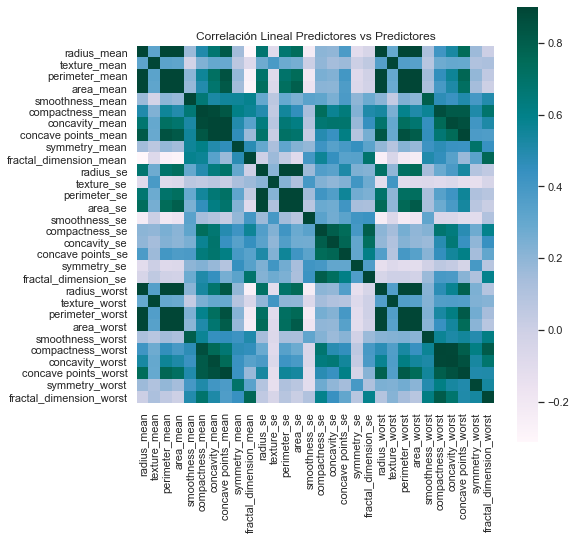

In [5]:
predictor_names = df.columns[2:]
n_show = min(len(predictor_names),50)

corrmat = df[predictor_names[:n_show]].corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.9, square=True, ax=ax,cmap="PuBuGn")
ax.set_title("Correlación Lineal Predictores vs Predictores")
plt.show()

Como se puede ver en las esquinas inferior izquierda y superior derecha, hay zonas más oscuras que indican una correlación mayor entre los datos. Esta correlación lineal puede afectar nuestro entrenamiento, ya que queremos que los datos sean lo más linealmente independientes posible. A continuación, realizaremos una reducción de dimensionalidad utilizando componentes principales.

In [6]:
pca = PCA(n_components=10) # modelo
principalComponents = pca.fit_transform(X) # componentes obtenidas ajustando el modelo a los datos.

Observaremos este ajuste por componentes viendo los gráficos de varianza y varianza acumulada:

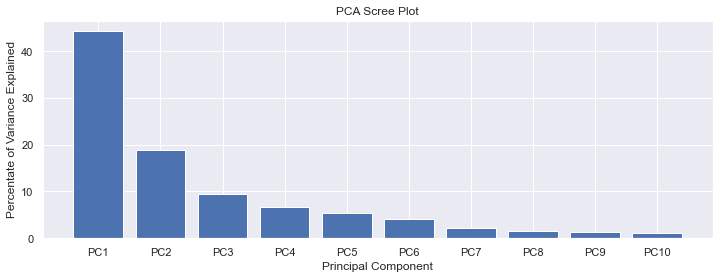

In [7]:
# grafico varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,11), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

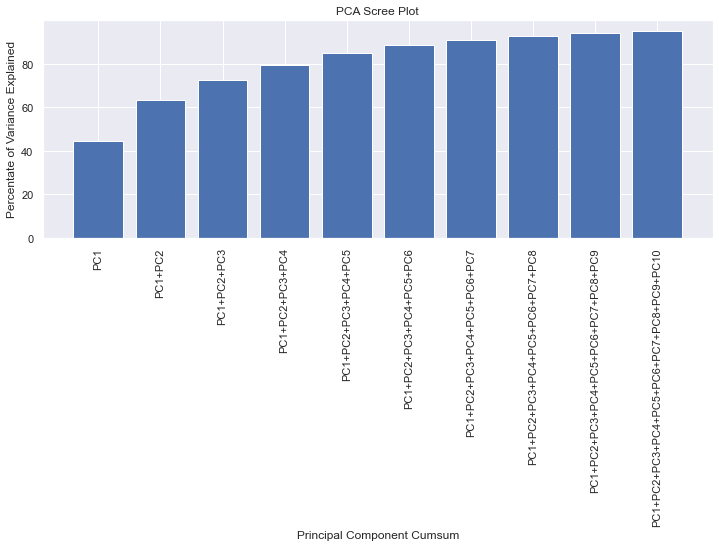

In [8]:
# grafico varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 
           'PC1+PC2', 
           'PC1+PC2+PC3', 
           'PC1+PC2+PC3+PC4', 
           'PC1+PC2+PC3+PC4+PC5', 
           'PC1+PC2+PC3+PC4+PC5+PC6',
           'PC1+PC2+PC3+PC4+PC5+PC6+PC7',
           'PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8',
           'PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9',
           'PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,11), height=percent_variance_cum, tick_label=columns)
plt.xticks(x= range(1,11), rotation='vertical')
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

In [9]:
percent_variance_cum

array([44.27, 63.24, 72.63, 79.23, 84.73, 88.75, 91.  , 92.59, 93.98,
       95.15])

El ajuste anterior nos indica que la varianza de las variables se puede explicar en 95.15% considerando solo las diez componentes principales (PC1, ... , PC10). Veamos cuáles son esas componentes:

In [10]:
principalDataframe = pd.DataFrame(data = principalComponents, 
                                  columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
targetDataframe = df[['diagnosis']]

df_red = pd.concat([principalDataframe, targetDataframe],axis = 1)
df_red.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,diagnosis
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157120,-0.877411,1
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240987,-0.711906,1.106996,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097372,0.024059,0.454251,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429912,1.059562,-1.405448,-1.117006,1
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636377,-0.263803,0.377714,1


In [35]:
lista = [['a','b','c'],['d','b','f'],['d','a','c']]
for k in range(len(lista)):
    print(lista[lista[k][1]=='b'])

['d', 'b', 'f']
['d', 'b', 'f']
['a', 'b', 'c']


Hemos reducido la dimensionalidad del conjunto de atributos a través del análisis de componentes principales. Ahora sobre el dataset obtenido a través de la reducción emplearemos tres modelos de clasificación y veremos sus métricas para evaluar su ajuste al fenómeno que estamos estudiando.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

# componentes proyectadas

X = df_red[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']]
Y = df_red['diagnosis']

# crear conjunto de entrenamiento y testeo pero en con las componentes proyectadas
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 2) 

In [12]:
# print rows train and test sets
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  569
numero de filas train set     :  381
numero de filas test set      :  188


Utilizaremos tres clasificadores:
* Random Forest
* Support Vector Machine
* One vs One

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn import svm

# creamos los modelos
clf1 = svm.SVC(random_state=2) # Clasificador 1: SVM
clf2 = RandomForestClassifier(max_depth=2, random_state=2) # Clasificador 2: Random Forest
clf3 = OneVsOneClassifier(LinearSVC(random_state=2)) # Clasificador 3: One vs One

In [14]:
# ajuste de los clasificadores a los conjuntos de entrenamiento
clf1.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)
clf3.fit(X_train,Y_train)

OneVsOneClassifier(estimator=LinearSVC(random_state=2))

Definimos las predicciones de los clasificadores sobre los conjuntos de entrenamiento y prueba.

In [15]:
Y_predict1_train = clf1.predict(X_train)
Y_predict1_test = clf1.predict(X_test)

Y_predict2_train = clf2.predict(X_train)
Y_predict2_test = clf2.predict(X_test)

Y_predict3_train = clf3.predict(X_train)
Y_predict3_test = clf3.predict(X_test)

Calculamos la `accuracy` de los modelos sobre los conjuntos de entrenamiento y de prueba.

In [16]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [17]:
print('Accuracy Score over train_set - Support Vector Machine: ', metrics.accuracy_score(Y_train, Y_predict1_train))
print('Accuracy Score over test_set - Support Vector Machine: ', metrics.accuracy_score(Y_test, Y_predict1_test)) 
print('')
print('Accuracy Score over train_set - Random Forest: ', metrics.accuracy_score(Y_train, Y_predict2_train))
print('Accuracy Score over test_set - Random Forest: ', metrics.accuracy_score(Y_test, Y_predict2_test)) 
print('')
print('Accuracy Score over train_set - One Vs One: ', metrics.accuracy_score(Y_train, Y_predict3_train))
print('Accuracy Score over test_set - One Vs One: ', metrics.accuracy_score(Y_test, Y_predict3_test)) 

Accuracy Score over train_set - Support Vector Machine:  0.9816272965879265
Accuracy Score over test_set - Support Vector Machine:  0.9787234042553191

Accuracy Score over train_set - Random Forest:  0.9396325459317585
Accuracy Score over test_set - Random Forest:  0.9308510638297872

Accuracy Score over train_set - One Vs One:  0.9868766404199475
Accuracy Score over test_set - One Vs One:  0.973404255319149


Este `score` obtenido nos indica que estos tres modelos se ajustan bastante bien a los datos. ¿Podría existir `overfitting` sobre la predicción de los modelos? La respuesta es __no__, pues hemos realizado previamente un PCA que nos permite asegurar la independencia lineal de los datos. No obstante, podríamos tener otro error que quizás no estemos considerando (además del `GAP` que se genera entre la predicción y el testeo). Para ver mejor el fenómeno que está ocurriendo ilustraremos más métricas sobre los conjuntos de entrenamiento y prueba asociados a cada modelo:

In [18]:
print('SUPPORT VECTOR MACHINE Train')
print('Accuracy Score - SVM - Train:', metrics.accuracy_score(Y_train, Y_predict1_train))
print('F1 Score - SVM - Train:', metrics.f1_score(Y_train, Y_predict1_train,average='weighted'))
class_report_RF_1 = classification_report(Y_train, Y_predict1_train) #classification report
print(class_report_RF_1)
print('')
print('')


print('SUPPORT VECTOR MACHINE Test')
print('Accuracy Score - SVM - Test:', metrics.accuracy_score(Y_test, Y_predict1_test))
print('F1 Score - SVM - Test:', metrics.f1_score(Y_test, Y_predict1_test,average='weighted'))
class_report_RF_2 = classification_report(Y_test, Y_predict1_test)
print(class_report_RF_2)
print('')
print('')

SUPPORT VECTOR MACHINE Train
Accuracy Score - SVM - Train: 0.9816272965879265
F1 Score - SVM - Train: 0.9815836712776035
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       242
           1       0.99      0.96      0.97       139

    accuracy                           0.98       381
   macro avg       0.98      0.98      0.98       381
weighted avg       0.98      0.98      0.98       381



SUPPORT VECTOR MACHINE Test
Accuracy Score - SVM - Test: 0.9787234042553191
F1 Score - SVM - Test: 0.9787234042553191
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       115
           1       0.97      0.97      0.97        73

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188





In [19]:
print('RANDOM FOREST Train')
print('Accuracy Score - RFC - Train:', metrics.accuracy_score(Y_train, Y_predict2_train))
print('F1 Score - RFC - Train:', metrics.f1_score(Y_train, Y_predict2_train,average='weighted'))
class_report_RF_3 = classification_report(Y_train, Y_predict2_train) #classification report
print(class_report_RF_3)
print('')
print('')


print('RANDOM FOREST Test')
print('Accuracy Score - RFC - Test:', metrics.accuracy_score(Y_test, Y_predict2_test))
print('F1 Score - RFC - Test:', metrics.f1_score(Y_test, Y_predict2_test,average='weighted'))
class_report_RF_4 = classification_report(Y_test, Y_predict2_test)
print(class_report_RF_4)
print('')
print('')

RANDOM FOREST Train
Accuracy Score - RFC - Train: 0.9396325459317585
F1 Score - RFC - Train: 0.9392832103666227
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       242
           1       0.94      0.89      0.92       139

    accuracy                           0.94       381
   macro avg       0.94      0.93      0.93       381
weighted avg       0.94      0.94      0.94       381



RANDOM FOREST Test
Accuracy Score - RFC - Test: 0.9308510638297872
F1 Score - RFC - Test: 0.9303606458427643
              precision    recall  f1-score   support

           0       0.93      0.97      0.94       115
           1       0.94      0.88      0.91        73

    accuracy                           0.93       188
   macro avg       0.93      0.92      0.93       188
weighted avg       0.93      0.93      0.93       188





In [20]:
print('ONE VS ONE Train')
print('Accuracy Score - OVO - Train:', metrics.accuracy_score(Y_train, Y_predict3_train))
print('F1 Score - OVO - Train:', metrics.f1_score(Y_train, Y_predict3_train,average='weighted'))
class_report_RF_5 = classification_report(Y_train, Y_predict3_train) #classification report
print(class_report_RF_5)
print('')
print('')


print('ONE VS ONE Test')
print('Accuracy Score - OVO - Test:', metrics.accuracy_score(Y_test, Y_predict3_test))
print('F1 Score - OVO - Test:', metrics.f1_score(Y_test, Y_predict3_test,average='weighted'))
class_report_RF_6 = classification_report(Y_test, Y_predict3_test)
print(class_report_RF_6)
print('')
print('')

ONE VS ONE Train
Accuracy Score - OVO - Train: 0.9868766404199475
F1 Score - OVO - Train: 0.9868454794840024
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       242
           1       0.99      0.97      0.98       139

    accuracy                           0.99       381
   macro avg       0.99      0.98      0.99       381
weighted avg       0.99      0.99      0.99       381



ONE VS ONE Test
Accuracy Score - OVO - Test: 0.973404255319149
F1 Score - OVO - Test: 0.9733701124016605
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       115
           1       0.97      0.96      0.97        73

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188





Todas las métricas anteriores nos indican que los modelos se ajustan bastante bien a los datos y, quizás, podríamos elegir el que mejor se ajusta observándolas. ¿Estamos en presencia de `underfitting` al tener `accuracy` y `F1` similares entre entrenamiento y prueba? __No__, pues el análisis por componentes principales nos indicó que tenemos una buena representación de los datos al reducir la dimensionalidad de los predictores.

En conclusión, `PCA` nos ha ayudado a quitarnos el peso de la `maldición de la dimensionalidad` del problema y hemos obtenido, a través de tres clasificadores, resultados que se aproximan bastante bien al fenómeno que se está estudiando.